<h1><center> Statistical Inference </center></h1>

* <h2>Hypothesis testing:  t-test, p-value and precision-recall</h2>

* <h2>Bayesian posterior inference: why priors, and why conjugate priors</h2>

<h3>Statical Inference = {</h3>
><p><h3><font color='red'>classical method</font> -- based strictly on random sampling data;</h3></p> 
><p><h3><font color='red'>Bayesian method</font> -- prior + sample data }</h3></p>


     
<p>Rong Huang, 5/30/2017</p>

 **Hypothesis testing: t-test, p-value, precision-recall** 
 
<h3><font color=red>Purpose:</font> To evaluate hypothesis made for population, based on sample data</h3>

* **Population**
* **Sample; Random Sampling, Random variable X={$X_1, X_2, ..., X_n$}**
* **Model; Estimation of sample parameters, $\bar{X}$**
* **Variance of Estimator**
     - <font color=blue>  For example: mean weight, $\bar{X}$, of kids age 10 (population), $\bar{X} = 50 \pm ??$ .</font>
     - <font color=purple>$\bar{X}$ normaly is not the actual mean of population, $\mu$</font>

* <h4>$\bar{X}$ also has its own distribution</h4>
    - <font color=purple>P($\bar{X_L}\lt\bar{X}\lt\bar{X_U}) = 1 - \alpha$
    - <font color=purple>How likely $\bar{X}$ is $\mu$ ? 95% sure ?</font>

* **degree of confidence (such as 95%); significance level (such as 0.05)**
* **Confidence interval ( $\bar{X_L}\lt\bar{X}\lt\bar{X_U}$ )**

** <font color=red>Central limit theorem:  _if repeatatively take sample_, their mean or sum distribution:</font> ** 
  - ** $n\ge30, and \to \infty$: $\bar{X} \to N\left(\mu, \frac{\sigma}{\sqrt{n}} \right)$ . where $\sigma:$ standard deviation of population . $(\sigma^2: variance)$**
  - ** z-statistic:  $z = \frac{\bar{X}-\mu}{\left(\frac{\sigma}{\sqrt{n}}\right)} \longrightarrow N\left(z;0,1\right)$, standard normal distribution**
  - ** $\sigma/\sqrt{n}$: standard error of $\bar{X}$. (standard error of estimator = its standard deviation)**

<img src="CLT_combine.png" width=600 height=350 />

**confidence interval: $\bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\le\mu\le\bar{X}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$.         For $1-\alpha =$ 95% $\to$ z=1.96**

** Reality: $\sigma$ unknown **
* **Well, when n very large: S ~ $\sigma$ , where $S^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2$ .  $ (S^2: variance $; $S$: $standard$  $deviation)$**
* **What if n not very large, but bell-shaped?**
** t-test $\Longrightarrow$ 
t-statistic (t-score) $t = \frac{\bar{X}-\mu}{\left(\frac{S}{\sqrt{n}}\right)}$ , & t-distribution  of (n-1) degree of freedom**
 <p><img src="Student_t_pdf.png" width = 300 height=300 /></p>
 ** $\frac{S}{\sqrt{n}}$: _estimated standard error_, or _standard error_ . Confidence interval: $\bar{X}-z_{\alpha/2}\frac{S}{\sqrt{n}}\le\mu\le\bar{X}+z_{\alpha/2}\frac{S}{\sqrt{n}}$**

**Applications of statistical inference:** 
   - **Estimations: proportion of favoring voters; everage weight of people; ...**
   - **Hypothesis tests: Brand A product better than Brand B?  A new drug is effective?** <br />
**hypothesis testing, among 2 controdictory hypothesis :**
   - **H0: new drug made no difference (null hypothesis; default hypothesis)** 
   - **H2: new drug made an improvement (alternative hypothesis)**  
   **change of 15 patients after new drug,  Is the change statistically significant?**  
   4.3, -2.1, 2.7, 1.9, -1.1, 4.2, 13.9, -2.8, 10.5, -0.5, -2.0, 30, 28, -0.5, 19

 <img src="T_left.png" width=270 height=250/>
Since $\bar{X}=5.113$, and $t_{0.05}\frac{S}{\sqrt{n}}=-4.343$. At 95% confident, lower bound $\bar{X}-t_{0.05}\frac{S}{\sqrt{n}} =5.113-4.343$ > 0. Improved. $\to$ reject H0 <br />
Or, t-statistic=-2.0732 $\to$ p-value = 0.0285 < 0.05, $\to$ reject H0

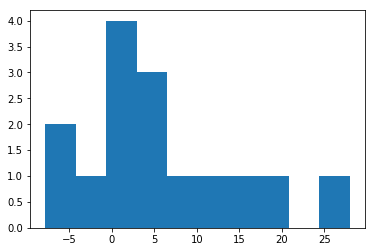

X_bar  &  delt_X  are:  5.113333333333333 -4.343330827944313
t statistic:  -2.0731968981192814


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.array([4.3, -2.1, 2.7, 1.9, 7.1, 4.2, 13.9, -7.8, 10.5, -0.5, 3.0, -7.0, 28, -0.5, 19])
plt.hist(X)
plt.show()
X_bar = np.mean(X)
n = 15
S = np.std(X)*np.sqrt(n/(n-1)) # np.std is root-mean-square, not exactly std_deviation !
t_alfa = -1.761              # https://surfstat.anu.edu.au/surfstat-home/tables/t.php
delt_X = t_alfa*S/np.sqrt(n)
t_score = (0-X_bar)/(S/np.sqrt(n))
print("X_bar  &  delt_X  are: ", X_bar,  delt_X)
print("t statistic: ", t_score)

<h4>Quote from wikipedia:</h4>
- <font color=red>**precision: retrieved-relevant-instances/all-retrieved-instances**</font>,  
   - **_tp/(tp+fp)_**.   how accurate among the case being identified. 
   - **fp: type I error (false positive). Type I error $\downarrow \longrightarrow$ precision $\uparrow$**
- <font color=red>**recall: retrieved-relevant-instances/total-relevant-instances**</font>,  
   - **_tp/(tp+fn)_**.    How likely the case can be indentified.
   - **fn: type II error (false negative: positive idenfied as negative). type II error $\downarrow \longrightarrow$ precision $\uparrow$** 
- **ideally, precision = 1, recall = 1**

**For 100 people, 10 cancer:**
- **if model identified 2 cancer, ==> precision=1, recall=0.2**
- **If model identifed all 10 cancer, plus falsely classified 30 non-cancer cases, ==> precision=0.25, recall=1**

#### For above case, $t-score\uparrow \longleftrightarrow p-value\downarrow \longleftrightarrow precision\uparrow \longleftrightarrow recall\downarrow$ ####
#### t-test, p-value also used for: estimating sample size; inferences on linear regression coefficients and prediction ###

**Bayesian inference**
- **Inferential statistics is not just data. It adds "prior" belief to the doubt of current data**
- **Models have parameters, such as in coin flipping,  P(x)=B(x;n,p)=${n\choose x}\theta^x(1-\theta)^{n-x}$**
- **In classic method, $\theta$ was a single value calucated from data, such as 0.5 for 5 heads, 5 tails.** 
   - **What if we have a doubt about data? _5 tosses got 4 heads? "prior" experience was 2-3 heads!_**
- **How to add prior into model? Treat parameter _$\theta$_ as prior distribution; with Bayesian inference to updata _p_ to posterior probability**

**Bayesian inference** <br />
**compare Bayes' rule (Bayes' theorem, Bayes' law):** Let Area($\Omega$)=1, P(A)=Area(A), P(B)=Area(B), P(A,B)=Area(A$\cap$B) <br />
. P(A|B)=Area(A$\cap$B)/Area(B)=P(A,B)/P(B).  (conditional probability) <br />
. P(B|A)=Area(B$\cap$A)/Area(A)=P(A,B)/P(A). <br />
. $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$. (Bayes' rule) . P(B): Marginal distribution.  <br />
**Bayesian inference.** Treat P(A) as the probability of model parameter P($\theta$), then posterior probability is:
 $P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}=\frac{P(X|\theta)P(\theta)}{\sum_\theta P(X|\theta)P(\theta)}$.   P(x): Marginal distribution 
 <img src="bayesRule.jpg" width=250 height=125>
. The likelihood function for 4 heads 1 tail flipping is: $P(X|\theta)=\prod P(X_i|\theta)=\theta^4(1-\theta)$ <br />
. Make assumption of prior: triangle with maximum at $\theta=0.5$ and zero at $\theta=$0, 1.  <br />
. prediction of $X_i$:  $P(X_i) = \int P(X_i|\theta) P(\theta)d\theta$ . ( **not** $P(X_i)=\underset{\theta}{max}$ $P(X_i|\theta)$ )

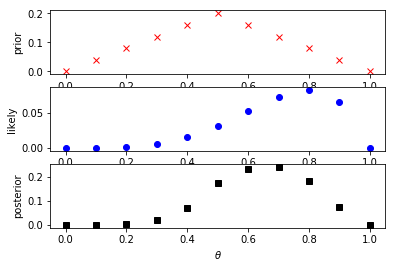

the probability of Head next:  0.6449031171019377


In [5]:
def bayes(m, n):         # m:toss #; n: division of theta 
    theta = np.linspace(0, 1.0, n+1) 
    prior = np.zeros(theta.shape);     likely = np.zeros(theta.shape)
    for i in range(len(prior)):
        prior[i] = min(1.0/n/n*4*i, 1.0/n/n*4*(n-i))
        if (i!=0)&(i!=n):
            likely[i] = theta[i]**(0.8*m) * (1-theta[i])**(0.2*m)
    PX_theta = likely * prior;  PX = sum(PX_theta)      # P(X)    
    Ptheta_X = PX_theta/PX   # P(theta|X)
    return prior, likely, Ptheta_X, theta
prior, likely, Ptheta_X, theta = bayes(5, 10)
plt.subplot(3,1,1); plt.plot(theta, prior, 'rx'); plt.ylabel("prior")
plt.subplot(3,1,2); plt.plot(theta, likely, 'bo'); plt.ylabel('likely')
plt.subplot(3,1,3); plt.plot(theta, Ptheta_X, 'ks'); plt.ylabel('posterior')
plt.xlabel(r'$\theta$'); plt.show()
P_head = sum(Ptheta_X * theta)    # P(H|theta)=theta
print("the probability of Head next: ", P_head)  # P_head = 0.6449

increase data size makes clear it's a biased coin


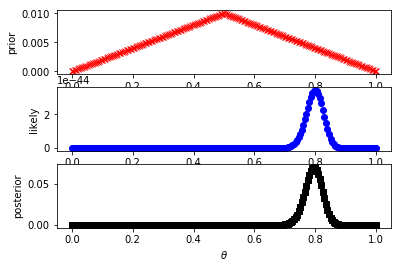

the probability of Head next:  0.7931034482758619


In [39]:
print("increase data size makes it clear that it's a biased coin")
prior, likely, Ptheta_X, theta = bayes(200, 200)
plt.subplot(3,1,1); plt.plot(theta, prior, 'rx'); plt.ylabel("prior")
plt.subplot(3,1,2); plt.plot(theta, likely, 'bo'); plt.ylabel('likely')
plt.subplot(3,1,3); plt.plot(theta, Ptheta_X, 'ks'); plt.ylabel('posterior')
plt.xlabel(r'$\theta$'); plt.show()
P_head = sum(Ptheta_X * theta)    # P(H|theta)=theta
print("the probability of Head next: ", P_head)

** <font color=red> How </font> to use it ?** 
- **Choose prior based on belief**
- **Figure out the likelyhood function**
- **Use Bayesian inference to calculate posterior probability**
- **Predict the probability ....**

#### <font color=red> Result </font> of using it ?####
- **A compromise between prior and data**
- **Little data (more prior) $\longrightarrow$ towards prior; little prior (more data) $\longrightarrow$ towards data**

<h4><font color=red> Conjugate prior</font>, a better way to do it</h4>
- ** In $P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}=\frac{P(X|\theta)P(\theta)}{\int P(X|\theta)P(\theta) d\theta}$, P($\theta$) is called _conjugate prior for $P(X|\theta)$_, if they have same form.** 
- ** Analytical calculations, simple and accurate **

**For coin flipping:** <br />
 . **Likelyhood function: Bernoulli distribution $\theta^z(1-\theta)^N$, _z_ heads, _N_ tails** <br />
 . **Prior: Beta distribution $P(\theta)=beta(\theta;a,b)=\theta^{(a-1)}(1-\theta)^{(b-1)}/B(a,b)$, the pdf of _a_ heads _b_ tails** <br />
 . **$B(a,b)=\int^1_0 beta(\theta;a,b)d\theta$, Beta function, to normalize beta** <br />
such as: $E(H) = \int P(H|\theta)P(\theta)d\theta = a/(a+b)$, and $E(T) = \int P(T|\theta)P(\theta)d\theta = b/(a+b)$, <br />
which can be proved with $B(a+1,b)=\frac{a}{a+b}B(a,b)$;  and $B(a,b+1)=\frac{b}{a+b}B(a,b)$
<img src="BetaDistr.png" width=250 heigth=250>
. $P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} = \frac{\theta^z(1-\theta)^N\theta^{(a-1)}(1-\theta)^{(b-1)}}{B(a,b)P(X)} = \frac{beta(\theta;z+a-1,b+N-1)}{B(z+a,N+b)}$ <br />
**So posterior = probability of (_z+a_) heads, and (_N+b_) tails = the prior flips + data flips !!** <br />
**And many can be conjugate priors: poisson, normal, exponential, ... et al.** 